In [99]:
# Alle Variablen löschen ohne zu fragen.
# Hierdurch werden Seiteneffekte vermieden.
%reset -f

In [100]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from   sklearn    import datasets

In [101]:
# Wiedrholbarer Zufall
np.random.seed(42)

In [102]:
def logistic(x):
    z = 1/(1+np.exp(-x))
    return z
print(logistic(4))
    
def Neuron(x, w, b):
    z = w[0]*x[0]+w[1]*x[1]+b
    #z = w*x+b
    y= logistic(z)
    return y
#print(Neuron([2.4,4.5],[-0.46561148 , 0.4093204 ],3))

0.9820137900379085


In [103]:
# Iris-Datensatz laden ...

iris = datasets.load_iris()

# Länge und Breite des Blütenblattes laden
# und die ersten 5 Werte ausgeben
x    = iris["data"][:, (2,3)]  
print('x = \n',x[0:5])
print()

# Typklasse der Lilienart festlegen
# "Iris virginica" --> 1, 
# "Iris setosa un Iris versicolor" --> 0
t    = (iris["target"]==2).astype(np.int) 
print('t = \n',t)
print()

# Anzahl der Datensätze
n = np.size(t)

print('x.shape =', x.shape)
print('t.shape =', t.shape)
print()
print('Anzahl der Datensätze  =', n)
print(x)
print(x[:,0])

x = 
 [[1.4 0.2]
 [1.4 0.2]
 [1.3 0.2]
 [1.5 0.2]
 [1.4 0.2]]

t = 
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1]

x.shape = (150, 2)
t.shape = (150,)

Anzahl der Datensätze  = 150
[[1.4 0.2]
 [1.4 0.2]
 [1.3 0.2]
 [1.5 0.2]
 [1.4 0.2]
 [1.7 0.4]
 [1.4 0.3]
 [1.5 0.2]
 [1.4 0.2]
 [1.5 0.1]
 [1.5 0.2]
 [1.6 0.2]
 [1.4 0.1]
 [1.1 0.1]
 [1.2 0.2]
 [1.5 0.4]
 [1.3 0.4]
 [1.4 0.3]
 [1.7 0.3]
 [1.5 0.3]
 [1.7 0.2]
 [1.5 0.4]
 [1.  0.2]
 [1.7 0.5]
 [1.9 0.2]
 [1.6 0.2]
 [1.6 0.4]
 [1.5 0.2]
 [1.4 0.2]
 [1.6 0.2]
 [1.6 0.2]
 [1.5 0.4]
 [1.5 0.1]
 [1.4 0.2]
 [1.5 0.2]
 [1.2 0.2]
 [1.3 0.2]
 [1.4 0.1]
 [1.3 0.2]
 [1.5 0.2]
 [1.3 0.3]
 [1.3 0.3]
 [1.3 0.2]
 [1.6 0.6]
 [1.9 0.4]
 [1.4 0.3]
 [1.6 0.2]
 [1.4 0.2]
 [1.5 0.2]
 [1.4 0.2]
 [4.7 1.

In [123]:
# Standardisierung der Daten
#Vom Mittelwert befreien und Standardabweichung=1
#for i in range(0,150):
x=x-np.mean(x)
x=x/np.std(x)
# Hier geht es los .........

In [124]:
print("Mittelwert   x = ", np.mean(x, axis=0))
print("Standardabw. x = ", np.var(x, axis=0))

Mittelwert   x =  [ 0.52239374 -0.52239374]
Standardabw. x =  [1.1394181  0.31479146]


In [125]:
# Minimum und Maximum der Daten finden
# (um später die Datenpunkte gut darstellen zu können)
x2min = np.min(x[:, 1]) # Minimum der zweiten Datenspalte berechnen
print('x2min =', x2min)
x1min = np.min(x[:, 0]) # Minimum der ersten Datenspalte berechnen
print('x1min =', x1min)

x2max = np.max(x[:, 1]) # Maximum der zweiten Datenspalte berechnen
print('x2max =', x2max)
x1max = np.max(x[:, 0]) # Maximum der ersten Datenspalte berechnen
print('x1max =', x1max)

x2min = -1.4002634821560003
x1min = -0.9172502525367466
x2max = 0.6917167161166632
x1max = 2.640084785359628


In [126]:
# Parameter und Variablen anlegen
# und initialisieren
eta    = 0.1
epochs = 15000

# Fehlervektor anlegen
E = np.zeros(epochs)
Ece = np.zeros(epochs)
print(E)
print(E[0])
# Gewichte und Bias anlegen und initialisieren
w = 1*(np.random.rand(2)-0.5)
#w = 1.7*(np.random.rand(3)-0.5) # 3 Gewichte
b = 0
print('w.shape =', w.shape)
print('w =', w)

[0. 0. 0. ... 0. 0. 0.]
0.0
w.shape = (2,)
w = [ 0.06266678 -0.41669742]


In [127]:
# Training des Neurons
for i in range(0,epochs):
    # Zufallsindex erzeugen zwischen 0 und 150
    idx = int(np.floor(150*np.random.rand(1))) #150 Datensätze
    xArray = np.array([x[idx,0],x[idx,1]])
    xArrayT = np.transpose(xArray)
    # Forward
    yc = Neuron(xArray,w,b) #tatsächlicher Wert
    tc = t[idx]               #gewünschter Wert
    # Backprop von w und b mit quad. Fehler
    w = w -eta*(yc-tc)*yc*(1-yc)*xArray
    b=b-eta*(yc-tc)*yc*(1-yc)
    # Backprop mit Crossentropy
    # Hier geht es los .........
    Ece[i]=-(tc*np.log(yc)+(1-tc)*np.log(1-yc))
    
    # Berechnung des aktuellen Fehlers E[i]
    E[i] = 0.5*((tc-yc)**2)
    #print(E)
    


[0.18525557 0.17983688 0.16971858 0.14701949 0.14701985 0.16330512
 0.16341777 0.15339771 0.12422534 0.13839498]
[0.17045763 0.1608987  0.15676576 0.15519056 0.15678512 0.15108649
 0.14485895 0.13144962 0.1208663  0.12667756]


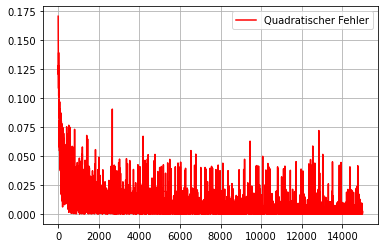

In [128]:
# Glättung der Fehlerwerte über 50 Werte
masksize = 4
kernel   = np.ones(masksize)/masksize
E_glatt = np.convolve(E, kernel, mode='valid')
m= 50
# Plotten des Fehlerverlaufs
plt.plot(E_glatt[0:epochs], 'red', label='Quadratischer Fehler')
plt.grid()
plt.legend(numpoints=None)
print(E[0:10])
print(E_glatt[0:10])

[0.18525557 0.17983688 0.16971858 0.14701949 0.14701985 0.16330512
 0.16341777 0.15339771 0.12422534 0.13839498]
[0.87726556 0.83805811 0.82102044 0.81456559 0.82100368 0.79815545
 0.77298447 0.71905181 0.67658988 0.69989191]


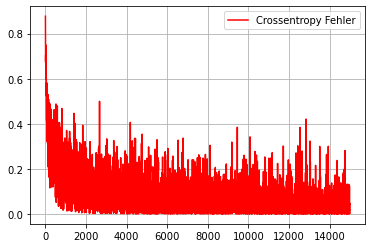

In [129]:
# Glättung der Fehlerwerte über 50 Werte
masksize = 4
kernel   = np.ones(masksize)/masksize
Ece_glatt = np.convolve(Ece, kernel, mode='valid')
m= 50
# Plotten des Fehlerverlaufs
plt.plot(Ece_glatt[0:epochs], 'red', label='Crossentropy Fehler')
plt.grid()
plt.legend(numpoints=None)
print(E[0:10])
print(Ece_glatt[0:10])

# Beispiel:
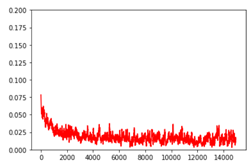

In [130]:
# Erzeugen der x- und y-Werte eines zweidimensionalen
# Gitters für die Darstellung des Eingangsvektorraumes
# im Bereich xmin bis xmax mit 100 Zwischenpositionen

xgrid = np.linspace(x1min, x1max, 100)
ygrid = np.linspace(x2min, x2max, 100)
XGrid, YGrid = np.meshgrid(xgrid, ygrid)

# Berechnung der Neuronen-Ausgabewerte Z für
# alle Gitterpunkte
Z = Neuron([XGrid,YGrid],w,b)
print(Z)
print('Z.shape     =', Z.shape) # Anm.: (100,100)

[[6.06231954e-06 6.98433558e-06 8.04657958e-06 ... 8.48088003e-01
  8.65443898e-01 8.81094898e-01]
 [6.60699067e-06 7.61184491e-06 8.76952565e-06 ... 8.58843724e-01
  8.75151680e-01 8.89817270e-01]
 [7.20059760e-06 8.29573251e-06 9.55742428e-06 ... 8.68955584e-01
  8.84252749e-01 8.97973895e-01]
 ...
 [2.48947746e-02 2.85728542e-02 3.27760859e-02 ... 9.99957468e-01
  9.99963082e-01 9.99967956e-01]
 [2.70709194e-02 3.10602723e-02 3.56160018e-02 ... 9.99960974e-01
  9.99966126e-01 9.99970597e-01]
 [2.94315475e-02 3.37567085e-02 3.86921415e-02 ... 9.99964191e-01
  9.99968918e-01 9.99973021e-01]]
Z.shape     = (100, 100)


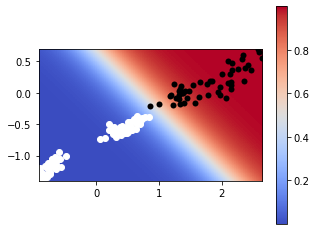

In [146]:
# Darstellung des Eingangsvektorraumes (cmap='coolwarm') ....

fig = plt.figure(1, figsize=(5, 4))
plt.imshow(Z, origin='lower', extent=[x1min,x1max,x2min,x2max ], cmap='coolwarm')
cb = plt.colorbar()
for i in range(0, 150):
        if t[i]==1:
            plt.scatter(x[i][0],x[i][1],c='k')
        else:
            plt.scatter(x[i][0],x[i][1],c='w')

# ... und Einzeichnen der Datenpunkte 
# ("iris virginica" --> schwarz, "alle anderen" --> weiss)
# "Iris virginica" --> 1, 
# "Iris setosa un Iris versicolor" --> 0


# Beispiel:
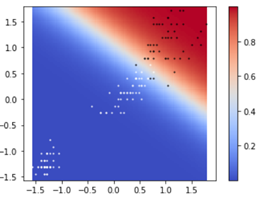